### Time Series prediction with LSTM Neural Network with (Keras tensorflow and Pytorch)
### S&P 500 Stock Price Prediction 
- Analyze 10 popular stocks and forecast the future prices & build forecasting models that predict the future market.

- We will use S&P 500 individual stocks dataset of 5 years (2013-02-08 to 2018-02-07 ).

- Build a predictive model that forecast future stock price & Compare model performance metrics with traditional & Machine learning algorithms of time series data predictions techniques



#### Steps :
1. Load dataset

2. Analyzing datasets for stock market prediction using machine learning techniques.

 - Given data of  Opening ,Highest and Lowest values of the stock  on the same day, & the Closing Value at the end of the day. Our dataset has (date,open,high,low,close,volume,Name)
 
 - Prerpare data and clean dataset , analysis , extract further data from avaliable datasets
 
 - Using Machine Learning algorithms & techniques to analyize  the data & develop different algorithms that may extract patterns from the historical data of the stocks.

3. Spliting data into train and test for preparing for model training.

4. Model evaluation metrics with RMSE & MAPE 

5. Predicte Stock Prices with traditional Time series model & forecasting analysis method 

    1.  Moving Average - SMA & EMA - stock market forecasting analysis method 
    2.  Auto ARIMA - (Auto Regessive Integrated Moving Average) model  -- traditional Time series model -- not included here

6. Build LSTM Recurrent Neural Networks of deep learning model of machine learning for Time series predictions. 

    1. LSTM Recurrent Neural Networks with keras tensorflow sequential model
    2. LSTM Recurrent Neural Networks with pytorch 
    
7. Evaluating the performance of a regression model


In [3]:
import numpy as np

import keras 
import tensorflow as tf

import torch 
import torch.nn as nn
from torch.autograd import Variable

from sklearn import model_selection

from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import root_mean_squared_error , mean_absolute_percentage_error

import pandas as pd

from scipy.special import expit

import matplotlib.pyplot as plt
import plotly.subplots as sp
import matplotlib.dates as mdates



### 1. Load dataset with panads

In [4]:
# 1. load dataset

stockprice_df = pd.read_csv('data/S&P500_individual_stocks_5yr.csv' ,index_col='date' )

stockprice_df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


### 2. Analyzing datasets for stock market prediction using machine learning techniques.

In [5]:
# 1. Analysis  & clean the dataset

def getDatasetInfo(df):

    unique = f"Number of unique stocks in dataset : {df['Name'].nunique()}"
    
    print(unique)
    print('...')


    print(f'Metadata of stocks dataset:\n')
    print(df.info())
    
    print('...')


    print( f'Number of null value in dataset :\n {df.isnull().sum()}')
    print('...')

    time_range_stocks = pd.to_datetime(df.index).max() - pd.to_datetime(df.index).min()

    time_range_stocks = f'Time range of stocks dataset : {time_range_stocks}'
    print(time_range_stocks)

    print(f'From {pd.to_datetime(df.index).min()} to {pd.to_datetime(df.index).max()}')
 
    return 

def cleanDataset(df):

    # rename Name to ticker
    df = df.rename(columns={'Name':'ticker'})

    # drop null values, since they dont have any effects
    df.dropna(inplace=True)

    # change date datatype form string to date
    # df.loc[:,'date'] = pd.to_datetime(df.loc[:, 'date'])
    df.index = pd.to_datetime(df.index)
    return df


getDatasetInfo(stockprice_df)

stockprice_df_updated = cleanDataset(stockprice_df)

# check if as expected , clean and correct dataset
print("...") 

print(stockprice_df_updated.isnull().sum())

print("...") 

stockprice_df_updated.head()

Number of unique stocks in dataset : 505
...
Metadata of stocks dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 619040 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    619029 non-null  float64
 1   high    619032 non-null  float64
 2   low     619032 non-null  float64
 3   close   619040 non-null  float64
 4   volume  619040 non-null  int64  
 5   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 33.1+ MB
None
...
Number of null value in dataset :
 open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64
...
Time range of stocks dataset : 1825 days 00:00:00
From 2013-02-08 00:00:00 to 2018-02-07 00:00:00
...
open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64
...


,open,high,low,close,volume,ticker
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
# get the shape of Dataframe & Check for Null Values

print(f'Dataframe Shape: {stockprice_df_updated.shape}')
print(f'Null Value Present: {stockprice_df_updated.isnull().values.any()}')

Dataframe Shape: (619029, 6)
Null Value Present: False


 #### Top 10 most traded stocks by volume over the past 5 years for analysis & comparison

In [7]:
# top 10 most traded stocks by volume over the past 5 years  for further analysis & comparison

def getTopMostTradedStocksByVolume(df):

    topStocksByAverageVolume = {}

    for stock in df['ticker'].unique():
        mean = df[df['ticker']==stock]['volume'].mean()
        topStocksByAverageVolume[stock] = mean

    # convert dict to pandas dataframe
    topStocksByAverageVolume = pd.Series(topStocksByAverageVolume).transpose()

    # sort by value & get top 10 stock by average value
    topStocksByAverageVolume = topStocksByAverageVolume.sort_values(ascending=False)[:10]

    return topStocksByAverageVolume

top10TradedStock = getTopMostTradedStocksByVolume(stockprice_df_updated)
top10TradedStock

BAC     9.363380e+07
AAPL    5.404790e+07
GE      4.211568e+07
F       3.446237e+07
FB      3.435927e+07
MSFT    3.386946e+07
AMD     3.251904e+07
MU      3.024841e+07
INTC    2.932671e+07
CSCO    2.865435e+07
dtype: float64

In [8]:

def getTop10TradedStocksData(df , top10TradedStock , ticker):    
    for stock in top10TradedStock.index:
        topTraddedStock = df[df['ticker'] == stock]

        if stock == ticker:
            
            topTraddedStock = topTraddedStock[topTraddedStock['ticker'] == ticker]
                
            return topTraddedStock

    return []


top10Stocks = {}
for stock in top10TradedStock.index:
    top10Stocks[stock] = getTop10TradedStocksData(df=stockprice_df_updated,top10TradedStock=top10TradedStock,ticker=stock)

top10Stocks['AAPL']

,open,high,low,close,volume,ticker
date,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL


In [9]:
# Add 'daily return' , ADTV , & 'mean' to our dataframe

def dailyReturn(df):

    df['daily_return'] = ((df['close'] - df['open']) / df['open'])*100

    df.style.format('{:.2f}%' , subset='daily_return')

    df['daily_average_price'] = (df['open'] + df['close'] + df['high'] + df['low'])/4
     
    return df


for stock in top10TradedStock.index:
    top10Stocks[stock] = dailyReturn(top10Stocks[stock])


top10Stocks['AAPL']



,open,high,low,close,volume,ticker,daily_return,daily_average_price
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206751,67.715650
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.719832,68.379250
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.421264,67.769025
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042850,66.824200
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.445600,66.670275
...,...,...,...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.367900,167.581250
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-3.313253,163.350000
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-1.640478,158.867500


In [10]:
averageDailyTradingVolumeList = {}

def getADTV(df):
    """ df['average daily trading volume'] = calculate average daily trading volume by adding up trading volume over the last X number of days. Then divide the total by X. For example, add the last 20 days of trading volume and divide by 20 to get the 20-day ADTV."""
    
    monthy_mean = df.groupby(pd.PeriodIndex(df.index, freq="M"))['volume'].mean()
    df_new = pd.DataFrame(monthy_mean[monthy_mean.index], index=monthy_mean.index)
    df_new = df_new.rename(columns ={'volume':'average daily trading volume'})
  
    return  df_new  # Monthly daily average

 
for stock in top10TradedStock.index:
    averageDailyTradingVolumeList[stock] = getADTV(top10Stocks[stock])


averageDailyTradingVolumeList['AAPL']


,average daily trading volume
date,
2013-02,1.151152e+08
2013-03,1.144458e+08
2013-04,1.242467e+08
2013-05,1.072722e+08
2013-06,8.769157e+07
...,...
2017-10,2.292232e+07
2017-11,2.858888e+07
2017-12,2.655920e+07


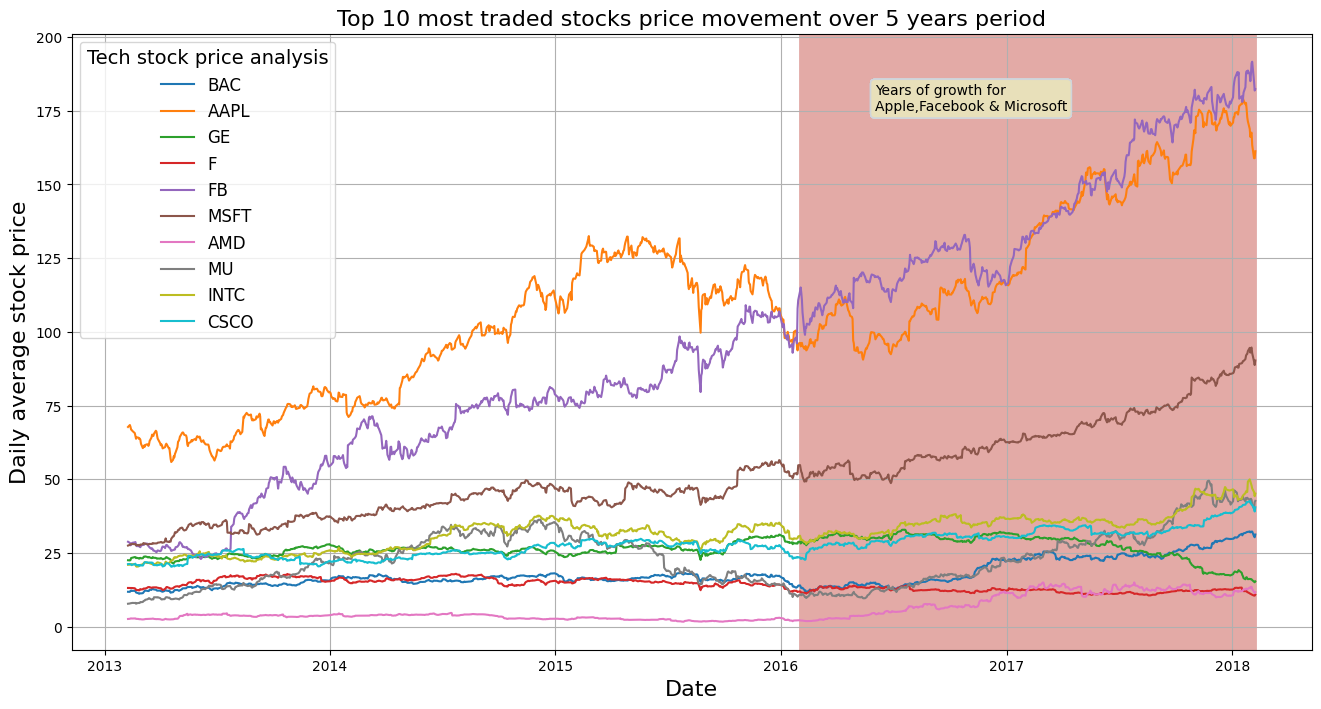

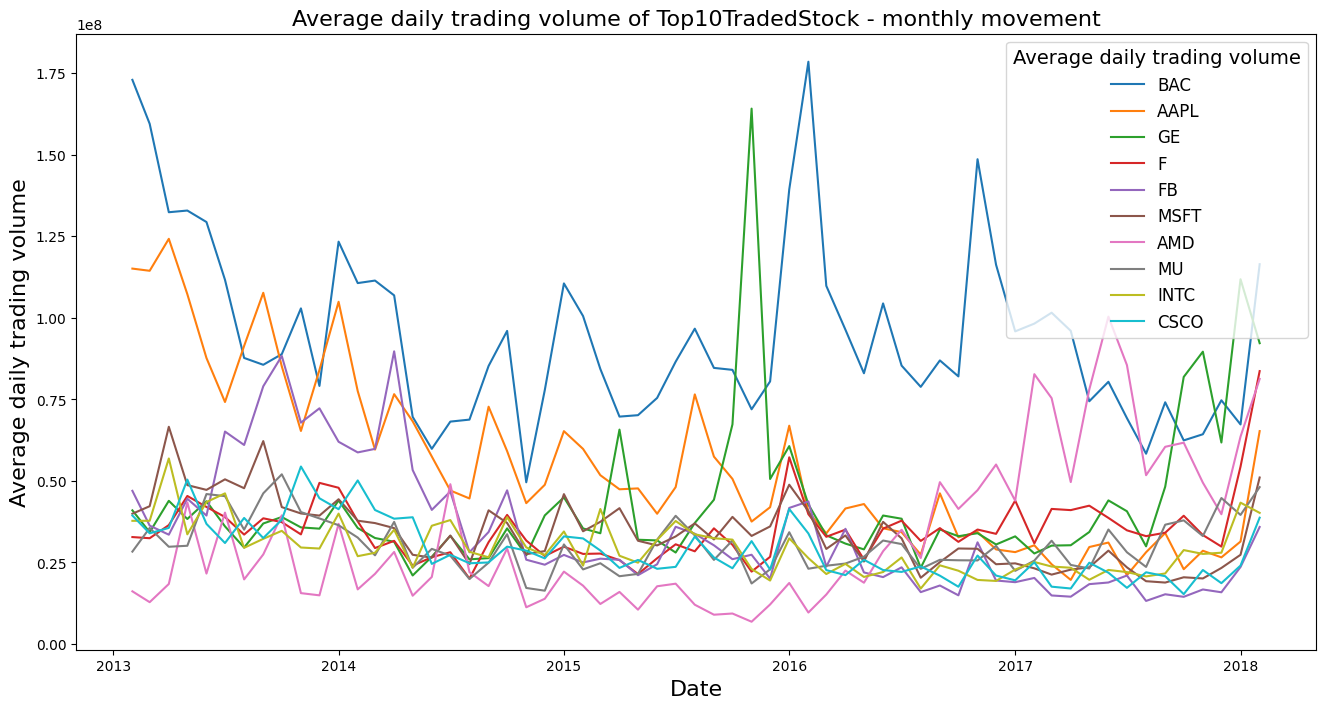

In [11]:

fig , ax = plt.subplots(figsize=(16,8))

for stock in top10TradedStock.index:

    t = top10Stocks[stock].index
    maxDate = pd.to_datetime(t).max()
    maxDate = maxDate.strftime('%Y-%m-%d')

    ax.plot(t, top10Stocks[stock]['daily_average_price'] ,  label=top10Stocks[stock]['ticker'].unique())
    ax.grid(True)
    ax.axvspan(*mdates.datestr2num(['2/1/2016',maxDate]), color='#e3aaa6')

    ax.annotate("Years of growth for\nApple,Facebook & Microsoft", xy=(mdates.datestr2num('6/1/2016'),175),
            bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'))

    ax.set_xlabel(f'Date', fontsize=16)
    ax.set_ylabel(f'Daily average stock price' ,fontsize=16)
    ax.set_title('Top 10 most traded stocks price movement over 5 years period', fontsize=16)
    ax.legend(  title="Tech stock price analysis", title_fontsize=14 , fontsize=12)

plt.show()
# ---

fig = sp.make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('','') )

df = top10Stocks[top10TradedStock.index[0]]
fig.append_trace({'x':df.index, 'y':df['daily_return'], 'name':top10TradedStock.index[0]},1,1,)

df = top10Stocks[top10TradedStock.index[1]]
fig.append_trace({'x':df.index, 'y':df['daily_return'], 'name':top10TradedStock.index[1]},2,1)

df = top10Stocks[top10TradedStock.index[2]]
fig.append_trace({'x':df.index, 'y':df['daily_return'], 'name':top10TradedStock.index[2]},3,1)


fig.update_xaxes(title_text="Date", row = 3, col = 1)
fig.update_yaxes(title_text="Daily return %", row = 2, col = 1)

fig['layout'].update(title=f"Daily return of investment trend of top 3 stocks")
fig.show()

# ---


fig , ax = plt.subplots(figsize=(16,8))

for stock in top10TradedStock.index:
    ax.plot(averageDailyTradingVolumeList[stock].index.to_timestamp(),averageDailyTradingVolumeList[stock]['average daily trading volume'], label=stock, lw=1.5)
    ax.set_title("Average daily trading volume of Top10TradedStock - monthly movement" ,fontsize=16)

    ax.set_xlabel("Date" , fontsize=16)
    ax.set_ylabel("Average daily trading volume" ,fontsize=16)
    ax.legend(title="Average daily trading volume", title_fontsize=14, fontsize=12)

plt.show()

In [12]:

# plt.figure(figsize=(16,8))

# top10Stocks['AAPL']['volume'].plot(label='AAPL close', title='APPLE VS FB Stock Volume' )

# top10Stocks['FB']['volume'].plot(label='FB close', title='APPLE VS FB Stock Volume')
# plt.legend()
# plt.show()

### 3. Spliting data into train and test for preparing for model training.

In [13]:
# make date col as index for rows.
def setDateAsIndex(df): # -- aready indexed , during  data load.
    for stock in top10TradedStock.index:
        df[stock]['date'] = pd.to_datetime(df[stock]['date'])
        df[stock].set_index('date', inplace=True)


In [14]:
#3. Train & test data split for time-series 


def splitDataset(stock_ds): #80% & 20% for train & test resp.
    train_size = int((0.8) * len(stock_ds))
    test_size = int(0.2 * len(stock_ds))

    train , test  = stock_ds[:train_size] , stock_ds[train_size:]

    return train , test


top10TradedStock_splits = {}

for stock in top10TradedStock.index:
    train, test = splitDataset(top10Stocks[stock])
    top10TradedStock_splits[stock] = {"train":train, "test":test}


# get shape of the datasets
top10TradedStock_splits['AAPL']['train'].shape ,top10TradedStock_splits['AAPL']['test'].shape ,top10Stocks['AAPL'].shape



((1007, 8), (252, 8), (1259, 8))

### 4. Predicte Stock Prices with machine learning algorithms & statical analysis method of time series forecasting:



#### 1.  Moving Average - SMA & EMA - stock market forecasting analysis method 
#### 2.  Model evaluation metrics with RMSE & MAPE 
#### 3.  LSTM Recurrent Neural Networks of deep learning model for Time series machine learning predictions. 
 


In [15]:
## get the 10, 50, 200 days of moving  average of stocks - uptrend and downtrends

def getSimpleMovingAverage(df):

    # SMA

    df.loc[:,'20DayAverage'] = df['close'].rolling(window=20).mean()
    df.loc[:,'50DayAverage'] = df['close'].rolling(window=50).mean()
    df.loc[:,'200DayAverage']= df['close'].rolling(window=200).mean()

    return df


def getExponentialMovingAverage(df):
        # EMA
    df.loc[:,'20EMA'] = df['close'].ewm(span=20, adjust=False).mean() #     ExponentialMovingWindow
    df.loc[:,'50EMA'] = df['close'].ewm(span=50, adjust=False).mean()
    df.loc[:,'200EMA'] = df['close'].ewm(span=200, adjust=False).mean()

    return df





### 1. SMA & EMA stock price predictions - with 20 , 50, 200 windows 

In [16]:
# update moving avarage for all top10TradedStock

top10TradedStock_splits_MA = {}
for stock in top10TradedStock.index:
    
    top10TradedStock_splits_MA[stock] = getSimpleMovingAverage(top10Stocks[stock])
    top10TradedStock_splits_MA[stock] =  getExponentialMovingAverage(top10Stocks[stock])

# SMA VS EMA vs Closing price
def plotTop10TradedStockMA(df):

    columnsSMA = ['20DayAverage','50DayAverage','200DayAverage']
    columnsEMA = ['20EMA' ,'50EMA', '200EMA']
     
    fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=(f"[MA vs Close]",f"[EMA vs Close]") )

    for col in columnsSMA:
        fig.append_trace({'x':df.index, 'y':df[col],'type':'scatter', 'name':col},1,1)
    fig.append_trace({'x':df.index, 'y':df['close'],'type':'scatter', 'name':'Closing price' , 'line':{'color':'#393f5e'}},1,1)

    for col in columnsEMA:
        fig.append_trace({'x':df.index, 'y':df[col],'type':'scatter', 'name':col},2,1)
    fig.append_trace({'x':df.index, 'y':df['close'],'type':'scatter', 'name':'Closing price' , 'line':{'color':'#393f5e'}},2,1)

    fig.update_xaxes(title_text="Date", row = 2, col = 1)
    fig.update_yaxes(title_text="MA", row = 1, col = 1)
    fig.update_yaxes(title_text="EMA", row = 2, col = 1)

    fig['layout'].update(title=f"Moving averages vs Closing Price of {df['ticker'].unique()[0]}")
    fig.show()


# exmaple 
df = top10TradedStock_splits_MA['AAPL']

plotTop10TradedStockMA(df)


- The trend chart shows the 50-day, 200-day for both SMA & EMA predictions compared with the true stock closing values.
- the 50-day SMA is a better trend indicator than the 200-day SMA in terms of (short-to-) medium movements.

### 2. Root Mean Squared Error (RMSE) & Mean Absolute Percentage Error (MAPE) % 

-   For performance comparison and measure accuracy of our SMA & EMA - 20, 50 , 200 days windnow techniques

In [17]:
top10TradedStock_splits_MA['FB'].shape, top10TradedStock_splits_MA['AAPL'].shape


((1259, 14), (1259, 14))

In [18]:


def calculate_RMSE(y_actual, y_pred):
    return np.sqrt(np.mean((y_actual - y_pred) ** 2))

def calculate_MAPE(y_actual, y_pred):
    y_pred , y_actual = np.array(y_pred) , np.array(y_actual)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

## evalutaion with test data

def getPerformanceMetricsAccuracy(stock):

    train_size = int((0.8) * len(top10TradedStock_splits_MA[stock])) ## 

    y_pred_50= np.array(top10TradedStock_splits_MA[stock]['50DayAverage'][train_size:]) 
    y_true_50 = np.array(top10TradedStock_splits_MA[stock]['close'][train_size:])

    RMSE_50 = calculate_RMSE(y_actual=y_true_50,y_pred=y_pred_50)
    MAPE_50 = calculate_MAPE(y_actual=y_true_50,y_pred=y_pred_50)


    y_pred_20= np.array(top10TradedStock_splits_MA[stock]['20DayAverage'][train_size:])
    y_true_20 = np.array(top10TradedStock_splits_MA[stock]['close'][train_size:])

    RMSE_20 = calculate_RMSE(y_actual=y_true_20,y_pred=y_pred_20)
    MAPE_20 = calculate_MAPE(y_actual=y_true_20,y_pred=y_pred_20)

    y_pred_200= np.array(top10TradedStock_splits_MA[stock]['200DayAverage'][train_size:])
    y_true_200 = np.array(top10TradedStock_splits_MA[stock]['close'][train_size:])

    RMSE_200 = calculate_RMSE(y_actual=y_true_200,y_pred=y_pred_200)
    MAPE_200 = calculate_MAPE(y_actual=y_true_200,y_pred=y_pred_200)

    # --- ['20EMA' ,'50EMA', '200EMA']

    y_pred_50= np.array(top10TradedStock_splits_MA[stock]['50EMA'][train_size:])
    y_true_50 = np.array(top10TradedStock_splits_MA[stock]['close'][train_size:])

    RMSE_50_EMA = calculate_RMSE(y_actual=y_true_50,y_pred=y_pred_50)
    MAPE_50_EMA = calculate_MAPE(y_actual=y_true_50,y_pred=y_pred_50)


    y_pred_20= np.array(top10TradedStock_splits_MA[stock]['20EMA'][train_size:])
    y_true_20 = np.array(top10TradedStock_splits_MA[stock]['close'][train_size:])

    RMSE_20_EMA = calculate_RMSE(y_actual=y_true_20,y_pred=y_pred_20)
    MAPE_20_EMA = calculate_MAPE(y_actual=y_true_20,y_pred=y_pred_20)

    y_pred_200= np.array(top10TradedStock_splits_MA[stock]['200EMA'][train_size:])
    y_true_200 = np.array(top10TradedStock_splits_MA[stock]['close'][train_size:])

    RMSE_200_EMA = calculate_RMSE(y_actual=y_true_200,y_pred=y_pred_200)
    MAPE_200_EMA = calculate_MAPE(y_actual=y_true_200,y_pred=y_pred_200)



    ## double check with sklearn metrics
    RMSE_SL_200 = root_mean_squared_error(y_true_200,y_pred_200) 
    MAPE_SL_200  = mean_absolute_percentage_error(y_true_200,y_pred_200) * 100 

    RMSE_SL_50 = root_mean_squared_error(y_true_50,y_pred_50) 
    RMSE_SL_50  = mean_absolute_percentage_error(y_true_50,y_pred_50) * 100 


    result_MA = { f'{stock}_MA' : {
                'RMSE_50':RMSE_50 ,
                'MAPE_50': MAPE_50, 
                'RMSE_20': RMSE_20 ,
                'MAPE_20' : MAPE_20 ,
                'RMSE_200' : RMSE_200,
                'MAPE_200' : MAPE_200
            }
    }

    result_EMA = { f'{stock}_EMA' : {
                'RMSE_50':RMSE_50_EMA ,
                'MAPE_50': MAPE_50_EMA, 
                'RMSE_20': RMSE_20_EMA ,
                'MAPE_20' : MAPE_20_EMA ,
                'RMSE_200' : RMSE_200_EMA,
                'MAPE_200' : MAPE_200_EMA
            }
    }
    return result_MA , result_EMA

result_MA , result_EMA  = [] ,[]
for ticker in top10TradedStock.index:
    MA , EMA = getPerformanceMetricsAccuracy(ticker)
    result_MA.append(MA)
    result_EMA.append(EMA)

result_MA , result_EMA


# top10Stocks['AAPL'].shape  

([{'BAC_MA': {'RMSE_50': 1.3789959595403358,
    'MAPE_50': 4.250591733862729,
    'RMSE_20': 0.8555067698933385,
    'MAPE_20': 2.88093899838003,
    'RMSE_200': 3.9147047680118154,
    'MAPE_200': 13.112852928429147}},
  {'AAPL_MA': {'RMSE_50': 7.906416818369345,
    'MAPE_50': 4.392839696912667,
    'RMSE_20': 4.81911812502829,
    'MAPE_20': 2.4314531351268935,
    'RMSE_200': 21.53097626743177,
    'MAPE_200': 13.389232530400285}},
  {'GE_MA': {'RMSE_50': 1.7205149700709077,
    'MAPE_50': 6.4007736426329025,
    'RMSE_20': 0.9063486732269859,
    'MAPE_20': 3.225868337391654,
    'RMSE_200': 4.6730664676897575,
    'MAPE_200': 18.7138793408659}},
  {'F_MA': {'RMSE_50': 0.5664354720250613,
    'MAPE_50': 3.806349754318275,
    'RMSE_20': 0.4061848665735016,
    'MAPE_20': 2.569719909022038,
    'RMSE_200': 0.7901506958880069,
    'MAPE_200': 5.941321610016235}},
  {'FB_MA': {'RMSE_50': 6.8851643113729075,
    'MAPE_50': 3.693933131497304,
    'RMSE_20': 3.8839151045926004,
    'MA

In [19]:
acc_df = pd.DataFrame()
for i in range(len(result_MA)):
    acc_df = pd.concat([acc_df,pd.DataFrame.from_dict(result_MA[i],orient='index')])
    acc_df = pd.concat([acc_df,pd.DataFrame.from_dict(result_EMA[i],orient='index')])
acc_df 

,RMSE_50,MAPE_50,RMSE_20,MAPE_20,RMSE_200,MAPE_200
BAC_MA,1.378996,4.250592,0.855507,2.880939,3.914705,13.112853
BAC_EMA,1.281004,3.920859,0.738379,2.416924,3.548821,12.378931
AAPL_MA,7.906417,4.392840,4.819118,2.431453,21.530976,13.389233
AAPL_EMA,7.144657,3.979674,4.148961,2.146525,19.337050,12.012261
GE_MA,1.720515,6.400774,0.906349,3.225868,4.673066,18.713879
GE_EMA,1.595694,6.071492,0.815975,2.948213,3.990247,15.814971
F_MA,0.566435,3.806350,0.406185,2.569720,0.790151,5.941322
F_EMA,0.489390,3.404110,0.336492,2.149418,0.746046,5.551062
FB_MA,6.885164,3.693933,3.883915,1.864267,21.004407,12.400663
FB_EMA,6.485661,3.555218,3.533148,1.760527,19.338951,11.570363


- Examining the performance metrics tracked here for top 10 most traded stock trends for period of 5 years, 

- The Mean Absolute Percentage Error &  Root Mean Squared Error (RMSE) perform better with 20 and 50 days window periods. 

- Exponential Moving average result show better prediction than the simple moving average , because it places more weight on recent price data, making it more responsive to trend changes and providing a more timely signal about market movements.




In [20]:

df = pd.DataFrame()
for stock in top10TradedStock.index:
   df = pd.concat([df,top10TradedStock_splits_MA[stock]])

stockprice_ds = df

# df[df['ticker'] == 'AAPL']



### 3.  LSTM Recurrent Neural Networks of deep learning model for Time series machine learning predictions. 

- Time-series data needs long-short term memory networks (LSTM) model that capture historical trend patterns, and predict future values with high accuracy.  

- Prediction with recurrent neural networks for time-series data give more accuracy than feed-forward NN, since  problem of feed-forward neural networks that are bad in recognizing sequences because they don't hold memory.

-  If the network is to remember more distant temporal events, memory cells must be added to the neurons to get a long-short term memory (LSTM) network

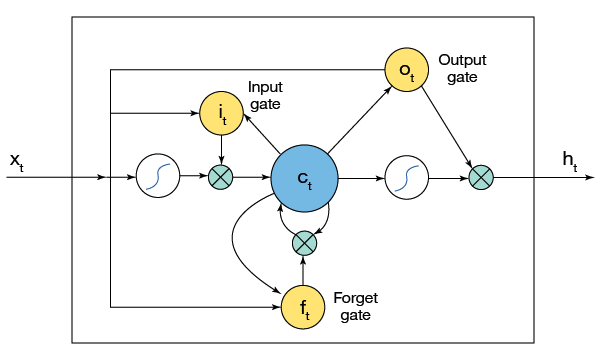


In [ ]:
# 1. Convert an array of values into a dataset matrix

#   Split the stock prices data into training sequence X and the next output value Y, 
#   X is the number of stock prices at a given time (t), & 
#   Y is the number of stock prices at the next time (t + 1)

"""Given the current time (t) to predict the value at the next time in the sequence (t+1),
 you can use the current time (t), as well as 
 the 50-1 prior times (t-1,t-2 ... t-50-1) as input variables. ===> {t, t1, t2, t3, ...t50-1}"""

# reshape into X=t and y=t + 1

def create_matrix_seqX_Y(data, N, start):
    """ Args:
        data - dataset
        N - window size, e.g., 50 for 50 days of historical stock prices
        start - offset position to start the split """ 

    X, y = [], []

    for i in range(start,len(data)):
        X.append(data[i - N:i]) ## getting the previous N data into X.  # X = t-1 - window 
        y.append(data[i]) #y = t

    return np.array(X) , np.array(y)


def fit_transform_dataframe(df):
    """Fit and transform numerical columns, apply expit to text columns."""

    numerical_cols = df.select_dtypes(include='number').columns
    text_cols = df.select_dtypes(exclude='number').columns


    scaler = StandardScaler()

    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    df[text_cols] = df[text_cols].applymap(expit)

    return df

In [22]:
"""Given the current time (t) to predict the value at the next time in the sequence (t+1),
 For predicting future values in time series data - the next time in the sequence (t+1), we need to use  (t - window) prior data as input.
 
 In our case, we can use window of 20, 50 , 200 window of past data to predict the future stock prices of top 10 traded stocks.
"""


tf.random.set_seed(7)  ## for reproducibility - debugging, sharing results, and comparing different models
                       ##- ensures that the random operations within TensorFlow produce the same results each time the code is run, given the same seed value.


# 1. Hyperparameters

stock = 'AAPL'
stock_ds = stockprice_ds[stockprice_ds['ticker']==stock]
window = 50  ## 20, 50 , 200

# model hyperparameters

input_size = 1
layer_units = 50
hidden_size = 50
num_layers = 2
output_size = 1  # num_classes = 13 , here will use closing price, per model excution, if neccesory you can filter dataset with other columns.

learning_rate=0.001

batch_size = 8
num_epochs = 100

scaler = StandardScaler()

# 2. Normlaize data with Scaler - data distribution of values so that mean of observed values = 0 and standad devation = 1.

def getSplitOfTransformedData(col='close'):

    scaledStock_ds = scaler.fit_transform(stock_ds[[col]]) ## close data col will be used to train the stock dataset.
    
    # 3. data preparation 
    train_size = int((0.8) * len(stock_ds))

    train, test = scaledStock_ds[0:train_size,:] ,scaledStock_ds[train_size:len(scaledStock_ds),:]
    
    # reshape into X=t & Y = t+1 ===> X =0:window, Y  = window + 1 & 
    # reshape our input data for model  like [samples, time steps, features]
    
    X_train, y_train = create_matrix_seqX_Y(train,N=window,start=window)
    X_test, y_test = create_matrix_seqX_Y(test,N=window,start=window)

    return X_train, y_train ,X_test, y_test

X_train, y_train ,X_test, y_test = getSplitOfTransformedData('close')

print({"train" : train.shape ,'test':test.shape})
print({'X_train':X_train.shape ,'X_test':X_test.shape , 'y_train':y_train.shape ,'y_test':y_test.shape}) 

X_train[0][:5]



{'train': (1007, 8), 'test': (252, 8)}
{'X_train': (957, 50, 1), 'X_test': (202, 50, 1), 'y_train': (957, 1), 'y_test': (202, 1)}


array([[-1.34925318],
       [-1.32610021],
       [-1.38236534],
       [-1.38652973],
       [-1.38849407]])

### Create and fit the LSTM Model

- LSTMs can be successfully trained when stacked into deep network architectures

- Stacked LSTMs network with layers - here will used 2 layers of LSTM,

- A neural network architecture  of 2 intermediary layers (hidden layers) between the input and output layers, with each hidden layer containing 50 LSTM units (blocks) designed to process sequential data effectively & an output layer that makes a single value prediction. 

- Tanh activation used as the output activation function for LSTM network  
- The network is trained for 100 epochs, and a batch size of 8 is used.



In [ ]:

# 4. Build model with Keras or torch nn.Module -- we used here both to see for comparesion.

### LSTM model with Kersa - tensorflow ###

def LSTM_model(X_train, layer_units):
    
    # X_train.shape == (957, 50, 1)
    
    input = keras.layers.Input(shape=(X_train.shape[1],1))  # shape = (50,1)

    hidden0 =keras.layers.LSTM(units=layer_units, return_sequences=True)(input) # output==units = 50
    hidden1 =keras.layers.LSTM(units=layer_units)(hidden0)
    outputLayer = keras.layers.Dense(1, activation='tanh')(hidden1) 
    # outputLayer = keras.layers.Dense(1, activation='linear')(hidden1) 

    # with linear activation , loss is better than tanh activation function ,
    # often less effective for complex problems that require non-linear relationships between features and outputs

    model = keras.Model(input,outputLayer)

    return model
    
model = LSTM_model(X_train,layer_units=layer_units)

model.summary()

model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(learning_rate=learning_rate))


class LossAndErrorPrintingCallback(keras.callbacks.Callback):

    def on_train_epoch_end(self, epoch, logs=None):

        print(f'Epoch {epoch}  Logs: {logs}')


    def on_train_batch_end(self, batch, logs=None):
        print(
            "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs)

        )
        
    def on_test_batch_end(self, batch, logs=None):
        print(
            "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs)

        )
        
    

history = model.fit(x=X_train, y=y_train, 
                                epochs=num_epochs, 
                                batch_size=batch_size,
                                verbose=2, 
                                validation_split=0.1,
                                shuffle=True 
                                # callbacks=[LossAndErrorPrintingCallback()]
                            )




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
108/108 - 2s - 16ms/step - loss: 0.0677 - val_loss: 0.0096
Epoch 2/100
108/108 - 1s - 8ms/step - loss: 0.0433 - val_loss: 0.0075
Epoch 3/100
108/108 - 1s - 9ms/step - loss: 0.0408 - val_loss: 0.0066
Epoch 4/100
108/108 - 1s - 8ms/step - loss: 0.0399 - val_loss: 0.0061
Epoch 5/100
108/108 - 1s - 8ms/step - loss: 0.0395 - val_loss: 0.0056
Epoch 6/100
108/108 - 1s - 9ms/step - loss: 0.0390 - val_loss: 0.0051
Epoch 7/100
108/108 - 1s - 8ms/step - loss: 0.0386 - val_loss: 0.0047
Epoch 8/100
108/108 - 1s - 8ms/step - loss: 0.0382 - val_loss: 0.0043
Epoch 9/100
108/108 - 1s - 8ms/step - loss: 0.0379 - val_loss: 0.0041
Epoch 10/100
108/108 - 1s - 8ms/step - loss: 0.0378 - val_loss: 0.0038
Epoch 11/100
108/108 - 1s - 8ms/step - loss: 0.0375 - val_loss: 0.0035
Epoch 12/100
108/108 - 1s - 8ms/step - loss: 0.0373 - val_loss: 0.0033
Epoch 13/100
108/108 - 1s - 9ms/step - loss: 0.0373 - val_loss: 0.0030
Epoch 14/100
108/108 - 1s - 8ms/step - loss: 0.0369 - val_loss: 0.0028
Epoch 15/100
1

-  using a linear activation function will result in a lower loss compared to a tanh activation function because a linear activation function does not introduce any non-linearity, essentially making your neural network behave like a single linear regression model, which is often less effective for complex problems that require non-linear relationships between features and outputs;


- while tanh, although still having limitations, at least provides some non-linearity to the model, which can be beneficial for learning more intricate patterns.

- with linear activation function  - loss: 0.0027 - val_loss: 0.0017
- with tanh activation function  - loss: 0.0349 - val_loss: 0.0020

In [24]:
history.history['loss'][-5:] , history.history['val_loss'][-5:]

([0.034859251230955124,
  0.03485184162855148,
  0.034837741404771805,
  0.03482532128691673,
  0.034868501126766205],
 [0.0018878745613619685,
  0.0018895933171734214,
  0.0018882635049521923,
  0.0018794495845213532,
  0.0020312482956796885])

dict_keys(['loss', 'val_loss'])

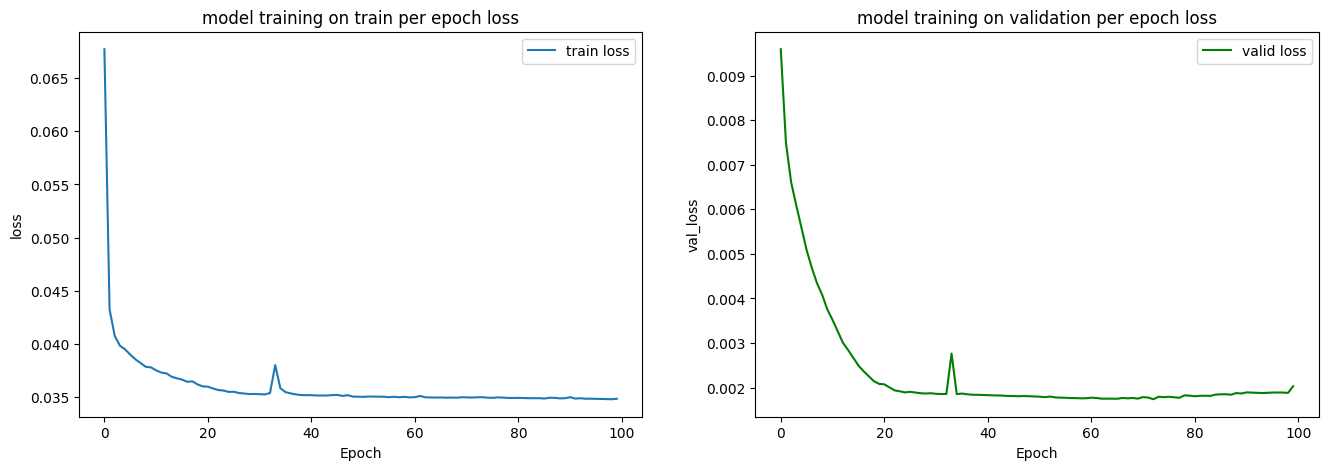

In [25]:


plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.grid(False)
plt.legend()
plt.title('model training on train per epoch loss')
plt.xlabel("Epoch")
plt.ylabel("loss")
#
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'], label='valid loss',color='green')
plt.grid(False)
plt.legend()
plt.title('model training on validation per epoch loss')
plt.xlabel("Epoch")
plt.ylabel("val_loss")

history.history.keys()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
The SMA and EMA models result of RMSE & RMSE
Test score of Simple moving average -  RMSE : 7.91
Test score of Simple moving average -  MPE : 4.39 %
Test score of Exponential moving average  - RMSE : 7.14
Test score of Exponential moving average  - MPE : 3.98 %
 ---------Vs -----------
Model performance -  y_true vs y_predicted
Test score with RMSE : 4.76 
Test score with MAPE : 2.09 %


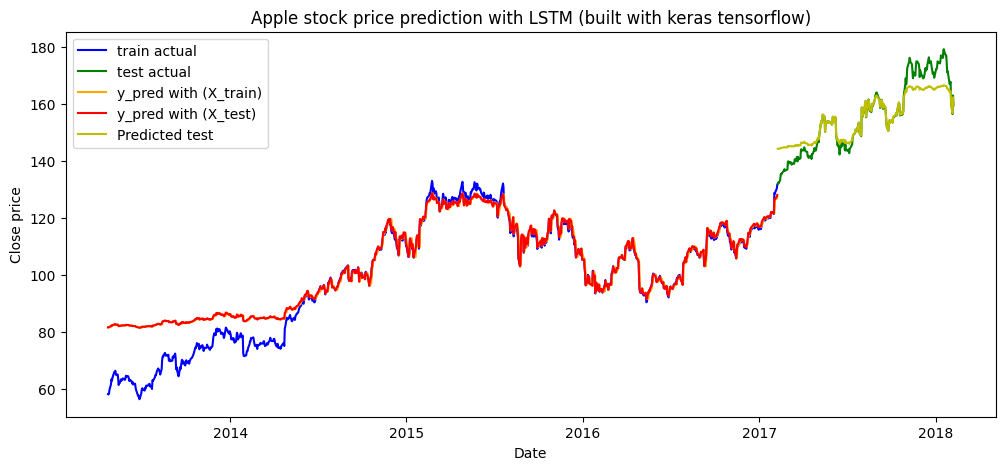

In [26]:
# Predict stock prices using past window_size  of stock dataset

# get split
train_size = int((0.8) * len(stock_ds))
test_size = len(stock_ds) - train_size

## -- train & test split df for plt
new_train_ds = stock_ds[window:train_size].copy()
new_test_ds = stock_ds[train_size:train_size+test_size+window].copy()

## -- get split sets of X & y for prediction
X_train, X_test, y_train, y_test = getSplitOfTransformedData(col='close')

X_train = X_train[:,-1,:] # reshape for model input

#  ---  train prediction
predicted_close_test= model.predict(X_test)  
predicted_close_train= model.predict(X_train)  

# -- inverse transform 
predicted_close_test = scaler.inverse_transform(predicted_close_test)
predicted_close_train = scaler.inverse_transform(predicted_close_train)


# --- test prediction 
_X_test = scaler.fit_transform(new_test_ds[['close']]) 

predicted_test= model.predict(_X_test)  


predicted_test = scaler.inverse_transform(predicted_test)

## Fill the data into dataframe's of respective dataset - split sets (train , test)
# --  train close vs pred_close on train data (X_train , X_test) 

new_train_ds.loc[:,"predictions_lstm_train"] = predicted_close_train 
new_train_ds.loc[:,"y_pred_lstm"] = predicted_close_test 

# -- test close vs pred_close on test data split 
new_test_ds.loc[:,"y_pred_lstm_test"] = predicted_test 


# ---- Model performance comparison of test close vs the predicted close


# # our lstm model trained with window = 50 , will get the data of moving average of 50 days window.

RMSE_pred_lstm = calculate_RMSE(np.array(new_test_ds["close"]), np.array(new_test_ds["y_pred_lstm_test"]))
MAPE_pred_lstm = calculate_MAPE(np.array(new_test_ds["close"]), np.array(new_test_ds["y_pred_lstm_test"]))

RMSE_pred_sma = calculate_RMSE(np.array(new_test_ds["close"]), np.array(new_test_ds["50DayAverage"]))
MAPE_pred_sma = calculate_MAPE(np.array(new_test_ds["close"]), np.array(new_test_ds["50DayAverage"]))

RMSE_pred_ema = calculate_RMSE(np.array(new_test_ds["close"]), np.array(new_test_ds['50EMA']))
MAPE_pred_ema = calculate_MAPE(np.array(new_test_ds["close"]), np.array(new_test_ds['50EMA']))

print("The SMA and EMA models result of RMSE & RMSE")

print(f"Test score of Simple moving average -  RMSE : {RMSE_pred_sma:.2f}")
print(f"Test score of Simple moving average -  MPE : {MAPE_pred_sma:.2f} %")

print(f"Test score of Exponential moving average  - RMSE : {RMSE_pred_ema:.2f}")
print(f"Test score of Exponential moving average  - MPE : {MAPE_pred_ema:.2f} %")

print(" ---------Vs -----------")


print("Model performance -  y_true vs y_predicted")

print(f"Test score with RMSE : {RMSE_pred_lstm:.2f} ")
print(f"Test score with MAPE : {MAPE_pred_lstm:.2f} %")



# ---------

plt.figure(figsize=(12,5))
plt.plot(new_train_ds["close"], c='b', label='train actual')
plt.plot(new_test_ds["close"], c='g' , label='test actual')


plt.plot(new_train_ds["predictions_lstm_train"], c='orange' , label='y_pred with (X_train)')
plt.plot(new_train_ds["y_pred_lstm"],c='r', label='y_pred with (X_test)')

plt.plot(new_test_ds["y_pred_lstm_test"],c='y' , label='Predicted test')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Apple stock price prediction with LSTM (built with keras tensorflow)')
plt.legend()

plt.show()



### Build a LSTM neural network model with Pytorch 

In [27]:
# 0. Data preparation 

stock = 'AAPL'
stock_ds = stockprice_ds[stockprice_ds['ticker']==stock]

# 0.1 Normalize the data to tensor & reshaping to sample, timestamps, features
# Standardizing - Making sure data formats are consistent 

scaler = StandardScaler()
stock_ds_scaled = scaler.fit_transform(stock_ds[['close']])


# 0.2 spliting datadset into train & test dataset
train_size = int(len(stock_ds_scaled) * 0.8)
test_size = len(stock_ds_scaled) - train_size

train , test = stock_ds_scaled[:train_size] , stock_ds_scaled[train_size:]


# 0.3 Convert a time series into a tensor of dimensions (window sample, time steps, features)

# input of 2D array return  3D tensor
def create_X_y_matrix(dataset, window): #windows on the time series data 
    """ 
    Transform a time series into a format suitable for a prediction model,    
    args : 
         dataset : a numpy array of time series, first dimention is the time steps
         window: size of window prediction data
     """
    
    X, y = [] , []
    
    for i in range(len(dataset) - window):

        feature = dataset[i:i + window]
        target = dataset[i + 1: i + window + 1]
 
        X.append(feature)
        y.append(target)

    return torch.tensor(np.array(X)) , torch.tensor(np.array(y)) #3D tensors


lookback = window
X_train , y_train = create_X_y_matrix(train, window=lookback) 
X_test , y_test = create_X_y_matrix(test, window=lookback) 


# 0.4 Convert datatype to float
X_train = torch.from_numpy(np.array(X_train).astype(np.float32))
X_test = torch.from_numpy(np.array(X_test).astype(np.float32))

y_train = torch.from_numpy(np.array(y_train).astype(np.float32))
y_test = torch.from_numpy(np.array(y_test).astype(np.float32))


# 0.5 reshaping
X_train = X_train[:train_size,:-1,:]
y_train = y_train[:train_size,-1,:]


X_test = X_test[:test_size,:-1,:]
y_test = y_test[:test_size,-1,:] #[:,-1,:]

X_train.shape , y_train.shape, X_test.shape , y_test.shape


(torch.Size([957, 49, 1]),
 torch.Size([957, 1]),
 torch.Size([202, 49, 1]),
 torch.Size([202, 1]))

In [28]:
# 1. Hyperparameters

window = 50  ## 20, 50 , 200

# model hyperparameters

input_size = 1
hidden_size = 50
num_layers = 2
output_size = 1  # num_classes = 13 , here will use closing price, per model excution, if neccesory you can filter dataset with other columns.

learning_rate=0.001
batch_size = 32
num_epochs = 100


In [29]:
# 2. Build LSTM model with with pytorch ##
class TimeSeriesLSTM(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers,output_size):
        super(TimeSeriesLSTM, self).__init__()

        self.num_layers = num_layers
        self.hidden_size = hidden_size
 
        self.lstm = nn.LSTM(input_size,hidden_size,num_layers=num_layers,batch_first=True)

        self.fc = nn.Linear(in_features=hidden_size,out_features=output_size )

    def forward(self, x):
 
        hidden0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).requires_grad_() #hidden state
        cell0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).requires_grad_() #inter

        out, _ = self.lstm(x,(hidden0,cell0)) #(batch_size , seq_length , hidden_size),(hidden0,cell0)
        
        # extract only the last time step => out = out[:, -1, :]
        out = out[:,-1,:] #reshape - (batch_size ,hidden_size)
        
        out = self.fc(out)

        out = torch.nn.functional.tanh(out)    # Tanh: Used as the output activation function in a standard LSTM network  

        return out
    


ts_model = TimeSeriesLSTM(input_size,hidden_size=hidden_size, output_size=output_size,num_layers=num_layers)

print(ts_model)

# 3. loss & optimizer 

learning_rate = 0.001
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(ts_model.parameters() ,lr=learning_rate)



# 4. Load X, y train & test sets with DataLoader 

# get validation dataset - split train & validation data
x_train, x_val, y_train_val, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.1, random_state=0) 


dataloader_train = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train,y_train), shuffle=True , batch_size=batch_size)
dataloader_test = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_test,y_test), shuffle=False , batch_size=batch_size)
dataloader_val = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_val,y_val), shuffle=False , batch_size=batch_size)


history = {'train_loss': [],'val_loss': [], 'train_RMSE': [] , 'test_RMSE' : []}

def validate(ts_model, dataloader_val, criterion):
    ts_model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # No need to track gradients during validation
        for inputs, targets in dataloader_val:
            inputs, targets = inputs, targets
            outputs = ts_model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    return val_loss / len(dataloader_val)


# 5. Training loop   
all_y_preds = []

for epoch in range(num_epochs):

    # training loop
    ts_model.train()

    epoch_loss = 0
    epoch_y_preds = []

    for i, (X , y) in enumerate(dataloader_train):

        # forward pass and compute the loss

        y_train_pred = ts_model(X)

        # loss & optim
        loss = criterion(y_train_pred,y)

        epoch_loss += loss.item()  # history = loss.item()
  
        #reset optimizer for each iter
        optimizer.zero_grad()

        # backpropagation of error, or a backward pass, to calculate the partial derivatives of the loss function.
        loss.backward()
        optimizer.step()
        
        epoch_y_preds.append(y_train_pred.detach()) #Detaching the predictions from the computation graph (outputs.detach()) is crucial to avoid memory leaks. 

    all_y_preds.append(epoch_y_preds) #torch.cat(epoch_y_preds, dim=0)

    train_loss =  epoch_loss / len(dataloader_train)
    history['train_loss'].append(train_loss)

     # 6. val loop
    val_loss = validate(ts_model, dataloader_val, criterion)
    history['val_loss'].append(val_loss)

    print(f'Epoch [{epoch+1}], train loss: {train_loss:.4f} , val loss: {val_loss:.4f}')
     
    # if (epoch + 1) % 100 != 0:
    #     continue


    # 7. evaluating the performance train vs test -- RMSE 
    ts_model.eval()
    with torch.no_grad():

        train_RMSE_epoch = 0.0
        test_RMSE_epoch = 0.0

        for _, (x_input , y_target) in enumerate(dataloader_train):  

            y_pred = ts_model(x_input) # predict 
            train_RMSE_epoch += np.sqrt(criterion(y_pred,y_target)).item() # get the RMSE

        train_RMSE = train_RMSE_epoch/ len(dataloader_train)

        for _, (Xtest , ytest) in enumerate(dataloader_test):  
            y_pred_test = ts_model(Xtest)
            test_RMSE_epoch += np.sqrt(criterion(y_pred_test,ytest)).item()
        
        test_RMSE = test_RMSE_epoch/ len(dataloader_test)
    
        print(f'Epoch : {epoch + 1}  train RMSE : {train_RMSE:.4f} test RMSE : {test_RMSE:.4f}')

        history['train_RMSE'].append(train_RMSE)
        history['test_RMSE'].append(test_RMSE)




TimeSeriesLSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)
Epoch [1], train loss: 0.3868 , val loss: 0.1004
Epoch : 1  train RMSE : 0.3739 test RMSE : 1.5012
Epoch [2], train loss: 0.0841 , val loss: 0.0456
Epoch : 2  train RMSE : 0.2459 test RMSE : 1.2654
Epoch [3], train loss: 0.0540 , val loss: 0.0353
Epoch : 3  train RMSE : 0.2110 test RMSE : 0.9897
Epoch [4], train loss: 0.0433 , val loss: 0.0310
Epoch : 4  train RMSE : 0.1986 test RMSE : 0.8750
Epoch [5], train loss: 0.0403 , val loss: 0.0283
Epoch : 5  train RMSE : 0.1942 test RMSE : 0.8458
Epoch [6], train loss: 0.0387 , val loss: 0.0278
Epoch : 6  train RMSE : 0.1925 test RMSE : 0.8184
Epoch [7], train loss: 0.0382 , val loss: 0.0270
Epoch : 7  train RMSE : 0.1897 test RMSE : 0.8111
Epoch [8], train loss: 0.0377 , val loss: 0.0272
Epoch : 8  train RMSE : 0.1888 test RMSE : 0.7927
Epoch [9], train loss: 0.0377 , val loss: 0.0266
Epoch : 9  train RMSE : 0.189

In [30]:
# history['train_RMSE'] ,history['test_RMSE'] , history['train_loss'] ,history['val_loss'] 

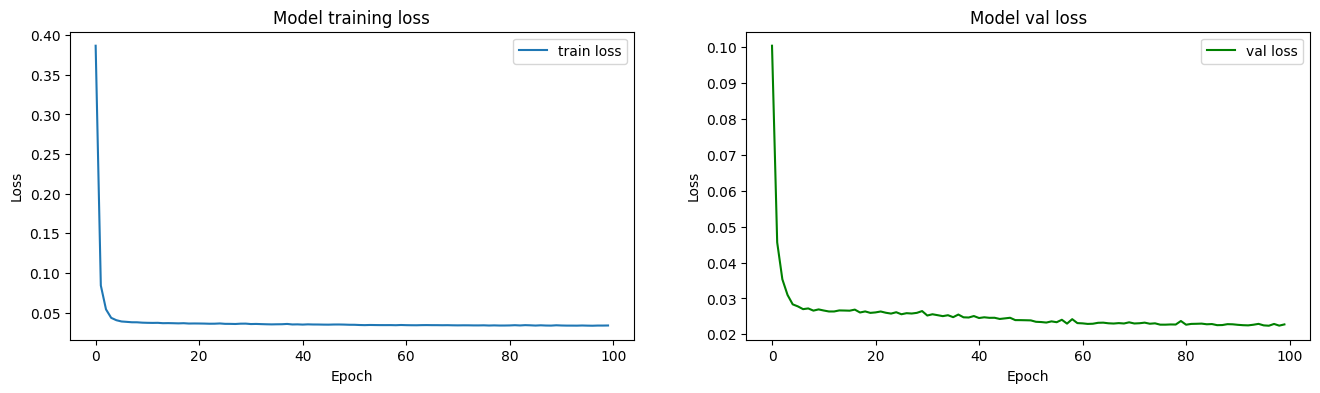

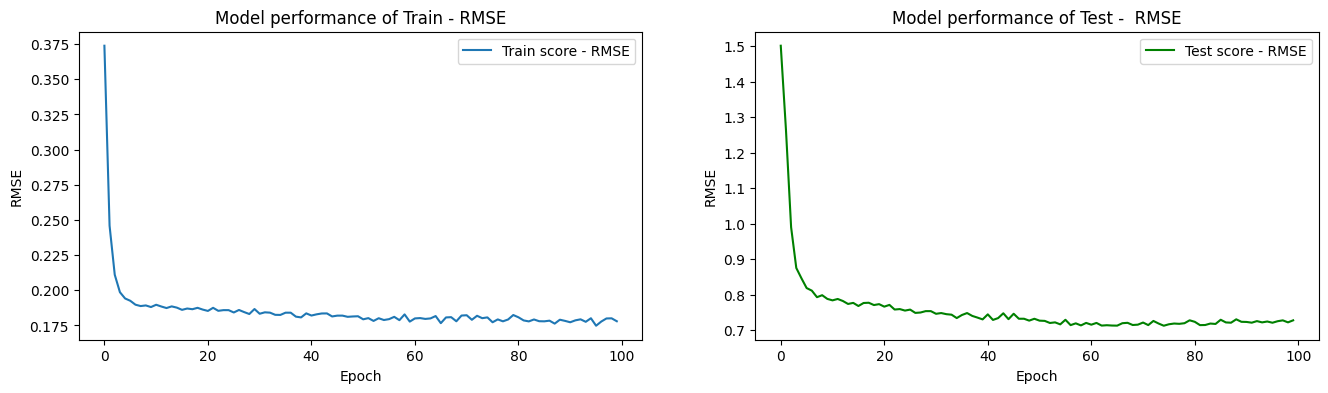

In [31]:
# Plot

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='train loss')
plt.grid(False)
plt.legend()
plt.title('Model training loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
#
plt.subplot(1,2,2)
plt.plot(history['val_loss'], label='val loss',color='green')
plt.grid(False)
plt.legend()
plt.title('Model val loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# ---history['train_RMSE'] ,history['test_RMSE']
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(history['train_RMSE'], label='Train score - RMSE')
plt.grid(False)
plt.legend()
plt.title('Model performance of Train - RMSE')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
#
plt.subplot(1,2,2)
plt.plot(history['test_RMSE'], label='Test score - RMSE',color='green')
plt.grid(False)
plt.legend()
plt.title('Model performance of Test -  RMSE')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()




8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step


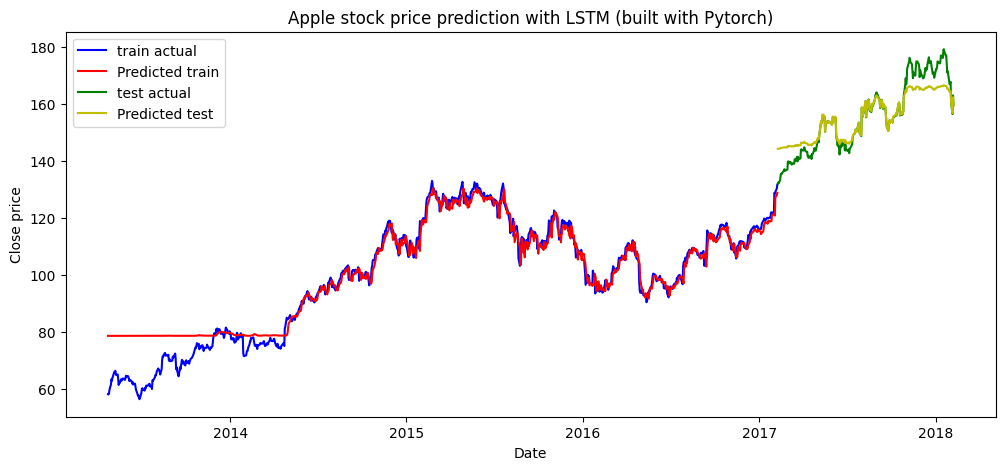

In [32]:

# plot predicted result 

with torch.no_grad():
    y_pred = ts_model(X_train)
    y_test_pred = ts_model(X_test)

#Shift train & test predictions for plotting 
new_train_ds = stock_ds[window:train_size].copy()
new_test_ds = stock_ds[train_size:train_size+test_size+window].copy()


new_train_ds.loc[:,"predictions_lstm_train"] = scaler.inverse_transform(y_pred) 

# --- test prediction 
_X_test = scaler.fit_transform(new_test_ds[['close']]) 

with torch.no_grad():
    predicted_test= model.predict(_X_test)  

new_test_ds.loc[:,"pred_lstm_pt_test"] = scaler.inverse_transform(predicted_test)


# -----------
plt.figure(figsize=(12,5))
plt.plot(new_train_ds['close'], c='b', label='train actual')
plt.plot(new_train_ds['predictions_lstm_train'],c='r', label='Predicted train')

plt.plot(new_test_ds['close'],c='g' , label='test actual')
plt.plot(new_test_ds['pred_lstm_pt_test'],c='y', label='Predicted test')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Apple stock price prediction with LSTM (built with Pytorch)')

plt.legend()

plt.show()




In [33]:
# our lstm model trained with window = 50 , will get the data of moving average of 50 days window.

RMSE_pred_lstm = calculate_RMSE(np.array(new_test_ds["close"]), np.array(new_test_ds["pred_lstm_pt_test"]))
MAPE_pred_lstm = calculate_MAPE(np.array(new_test_ds["close"]), np.array(new_test_ds["pred_lstm_pt_test"]))


RMSE_pred_sma = calculate_RMSE(np.array(new_test_ds["close"]), np.array(new_test_ds["50DayAverage"]))
MAPE_pred_sma = calculate_MAPE(np.array(new_test_ds["close"]), np.array(new_test_ds["50DayAverage"]))

RMSE_pred_ema = calculate_RMSE(np.array(new_test_ds["close"]), np.array(new_test_ds['50EMA']))
MAPE_pred_ema = calculate_MAPE(np.array(new_test_ds["close"]), np.array(new_test_ds['50EMA']))

print("The SMA and EMA models result of RMSE & RMSE")

print(f"Test score of Simple moving average -  RMSE : {RMSE_pred_sma:.2f}")
print(f"Test score of Simple moving average -  MPE : {MAPE_pred_sma:.2f} %")

print(f"Test score of Exponential moving average  - RMSE : {RMSE_pred_ema:.2f}")
print(f"Test score of Exponential moving average  - MPE : {MAPE_pred_ema:.2f} %")

print('...')


print("LSTM Model performance -  y_true vs y_predicted - test split sets")

print(f"Test score with RMSE : {RMSE_pred_lstm:.2f} ")
print(f"Test score with MAPE : {MAPE_pred_lstm:.2f} %")


print('...')

print(f"Model eval performance last five RMSE - ") 

history['train_RMSE'][-5:] , history['test_RMSE'][-5:]

The SMA and EMA models result of RMSE & RMSE
Test score of Simple moving average -  RMSE : 7.91
Test score of Simple moving average -  MPE : 4.39 %
Test score of Exponential moving average  - RMSE : 7.14
Test score of Exponential moving average  - MPE : 3.98 %
...
LSTM Model performance -  y_true vs y_predicted - test split sets
Test score with RMSE : 4.76 
Test score with MAPE : 2.09 %
...
Model eval performance last five RMSE - 


([0.17478453020254772,
  0.1777539166311423,
  0.17994532585144044,
  0.18004373634854953,
  0.17796678865949314],
 [0.7206944950989315,
  0.7249829002789089,
  0.7273862617356437,
  0.7217817306518555,
  0.7274847711835589])